In [56]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Loading the loan data in respective dataframe
loan = pd.read_csv(r"loan.csv",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
total_rows = len(loan.index)
print(total_rows)

39717


In [58]:
# identifying rows and columns having all missing values
print("Rows with all missing values : ", loan.isnull().all(axis=1).sum())
print("Columns with missing values : ",loan.isnull().all(axis=0).sum())

Rows with all missing values :  0
Columns with missing values :  54


In [59]:
# 54 Columns have all missing values. 
# Finding the names of those columns and dropping them from the dataframe (as they will not help in our analysis)
emptycols = loan.columns[loan.isnull().all()].tolist()
loan = loan.drop(emptycols, axis = 1)
print("Number of Columns Left : ", len(loan.columns))
# Now we have only 57 columns to work on further

Number of Columns Left :  57


In [60]:
# Finding missing values percentage (column-wise)
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [61]:
# Removing columns which have more than 60 percent data missing ('mths_since_last_delinq','mths_since_last_record','next_pymnt_d')
loan = loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
print("Number of Columns Left : ", len(loan.columns))

Number of Columns Left :  54


In [62]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [63]:
# Removing columns that have only single unique value because they are not adding any meaning to the data
single = loan.loc[:,loan.apply(pd.Series.nunique) == 1].columns
print("Removing columns:",single)
loan = loan.drop(single, axis=1)
print("Number of Columns Left : ", len(loan.columns))

Removing columns: Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
Number of Columns Left :  45


In [64]:
# Removing columns which are customer behavior variables as these are not available at the time of loan application
loan = loan.drop(['last_credit_pull_d','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                  'total_rec_int','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                  'delinq_2yrs','revol_bal','total_rec_late_fee'],axis=1)
print("Number of Columns Left : ", len(loan.columns))

Number of Columns Left :  31


In [65]:
# Removing columns that have no impact on our analysis(e.g. column desc, url, emp_title, title,addr_state) 
# because these will not help us understand trends
loan = loan.drop(['desc','url','emp_title','addr_state'],axis=1)
print("Number of Columns Left : ", len(loan.columns))

Number of Columns Left :  27


In [66]:
# Removing columns which are redundant
loan = loan.drop(['zip_code','title','member_id','sub_grade'], axis = 1)
print("Number of Columns Left : ", len(loan.columns))

Number of Columns Left :  23


In [67]:
print("Rows with missing values : ", loan.isnull().any(axis=1).sum())

Rows with missing values :  1819


In [68]:
#Removing all rows that have missing values
loan = loan[loan.isnull().sum(axis=1) == 0]
#Checking for any left missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [69]:
# Removing outliers using zscore 
from scipy import stats

numeric_cols = loan.select_dtypes(include=[np.number]).columns
print(numeric_cols)
z = loan[numeric_cols].apply(stats.zscore)

loan = loan[(z < 3).all(axis=1)]
print(len(loan.index))

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')
34106


In [70]:
# Removing columns that have only single unique value because they are not adding any meaning 
# to the data after outlier removal
single = loan.loc[:,loan.apply(pd.Series.nunique) == 1].columns
print("Removing columns:",single)
loan = loan.drop(single, axis=1)
print("Number of Columns Left : ", len(loan.columns))

Removing columns: Index(['pub_rec', 'pub_rec_bankruptcies'], dtype='object')
Number of Columns Left :  21


In [71]:
# Also since our aim is to identify patterns which indicate if a person is likely to default, loan_status "Current", 
# would not help us since those loans are still ongoing and do not inform us about the final status of the loan.
# Hence removing the rows where status is 'Current'
loan = loan[loan['loan_status']!= 'Current']

In [72]:
#Percentage of rows Left
print(100*(len(loan.index))/total_rows)

83.48314323841176


In [73]:
# Standarizing and correcting Column values so we can work on them
loan['int_rate'] = pd.to_numeric(loan['int_rate'].str.strip('%'))
loan['revol_util'] = pd.to_numeric(loan['revol_util'].str.strip('%'))
loan['emp_length'] = loan.emp_length.replace({ '1 year':  1,
'< 1 year': 0,
'2 years': 2,
'3 years': 3,
'4 years': 4,
'5 years': 5,
'6 years': 6,
'7 years': 7,
'8 years': 8,
'9 years': 9,
'10+ years' : 10})
loan['term']= pd.to_numeric(loan['term'].str.strip(' months'))

loan['grade'] = loan.grade.replace({ 'A':  1,
'B': 2,
'C': 3,
'D': 4,
'E': 5,
'F': 6,
'G': 7})

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33157 entries, 0 to 39002
Data columns (total 21 columns):
id                     33157 non-null int64
loan_amnt              33157 non-null int64
funded_amnt            33157 non-null int64
funded_amnt_inv        33157 non-null float64
term                   33157 non-null int64
int_rate               33157 non-null float64
installment            33157 non-null float64
grade                  33157 non-null int64
emp_length             33157 non-null int64
home_ownership         33157 non-null object
annual_inc             33157 non-null float64
verification_status    33157 non-null object
issue_d                33157 non-null object
loan_status            33157 non-null object
purpose                33157 non-null object
dti                    33157 non-null float64
earliest_cr_line       33157 non-null object
inq_last_6mths         33157 non-null int64
open_acc               33157 non-null int64
revol_util             33157 non-null f

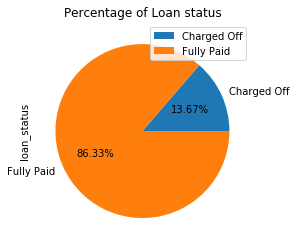

In [74]:
# since we want to find whether people default or not on the loan,the loan_status column will be our target variable
# Unordered Categorical Variables - Univariate Analysis
loan.groupby('loan_status')['loan_status'].count().plot.pie(rot=0, autopct='%.2f%%', title = 'Percentage of Loan status')
plt.legend()
#Plot shows that maximum number of loans were full paid back(86.33%) while only 13.67% of the borrowers defaulted on their loans


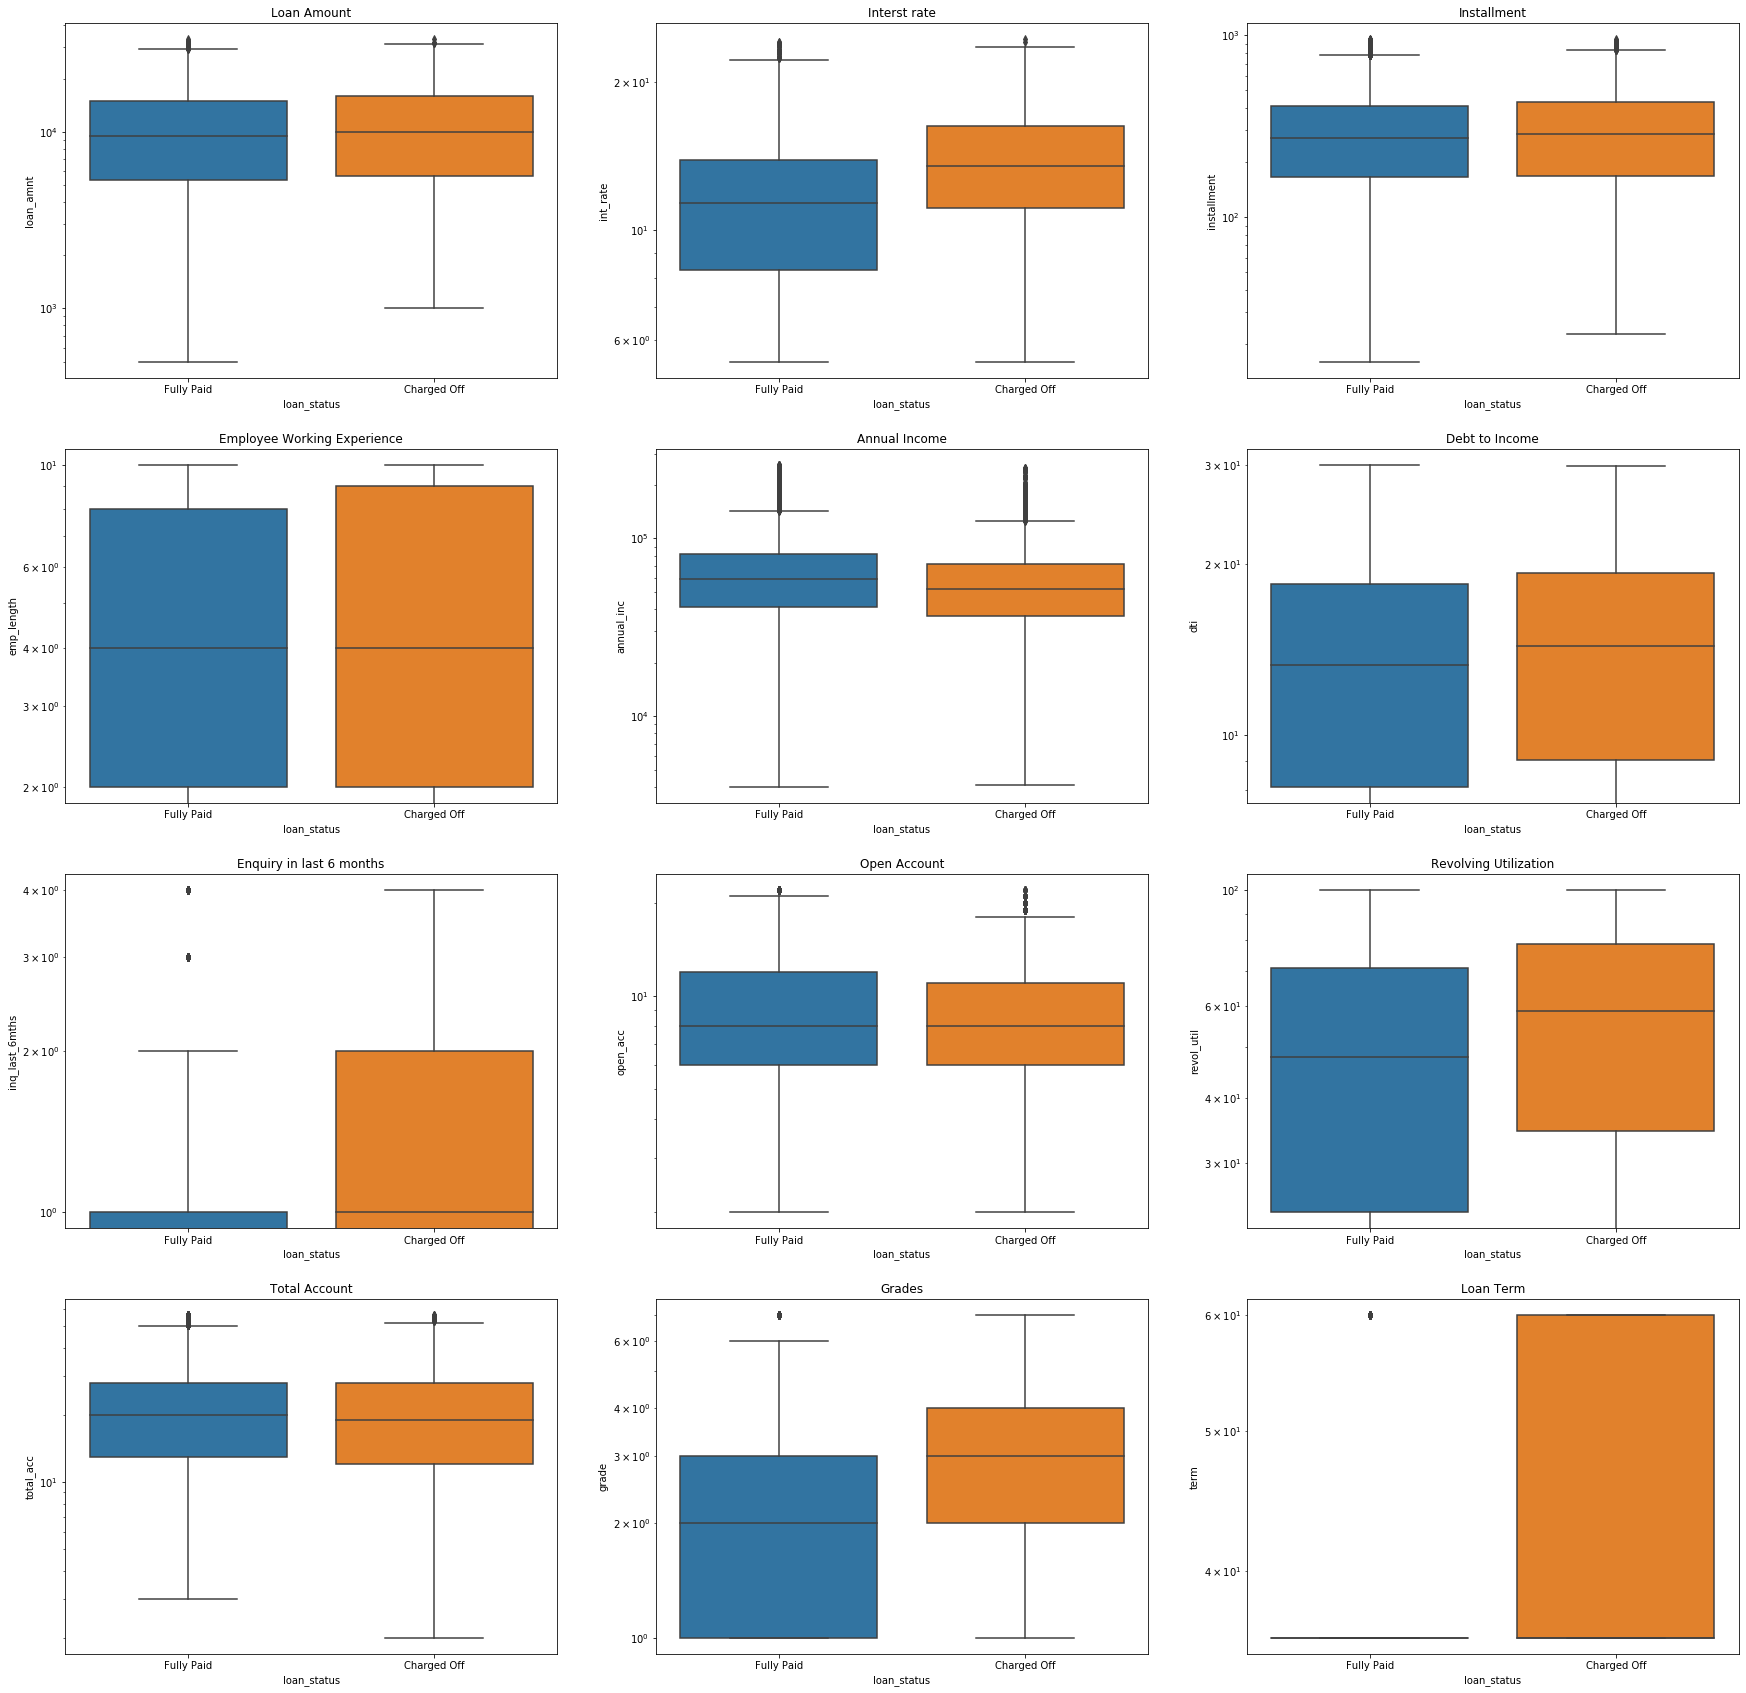

In [75]:
# Segmented univariate analysis
# similarily, Let us see if other variables have any impact on the loan_status
plt.figure(figsize=(30, 30))

# subplot 1: loan_amnt
plt.subplot(4, 3, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)
plt.title("Loan Amount")
plt.yscale('log')

# subplot 2: int_rate
plt.subplot(4, 3, 2)
sns.boxplot(x="loan_status", y="int_rate",  data=loan);
plt.title("Interst rate")
plt.yscale('log')

# subplot 3: installment
plt.subplot(4, 3, 3)
sns.boxplot(x="loan_status", y="installment",  data=loan)
plt.title("Installment")
plt.yscale('log')

# subplot 4: emp_length
plt.subplot(4, 3, 4)
sns.boxplot(x="loan_status", y="emp_length",  data=loan)
plt.title("Employee Working Experience")
plt.yscale('log')

# subplot 5: annual_inc
plt.subplot(4, 3, 5)
sns.boxplot(x='loan_status', y='annual_inc', data=loan)
plt.title("Annual Income")
plt.yscale('log')

# subplot 6: dti
plt.subplot(4, 3, 6)
sns.boxplot(x='loan_status', y='dti', data=loan)
plt.title("Debt to Income")
plt.yscale('log')


# subplot 7: inq_last_6mths
plt.subplot(4, 3, 7)
sns.boxplot(x='loan_status', y='inq_last_6mths', data=loan)
plt.title("Enquiry in last 6 months")
plt.yscale('log')


# subplot 8: open_acc
plt.subplot(4, 3, 8)
sns.boxplot(x='loan_status', y='open_acc', data=loan)
plt.title('Open Account')
plt.yscale('log')


# subplot 9: revol_util
plt.subplot(4, 3, 9)
sns.boxplot(x='loan_status', y='revol_util', data=loan)
plt.title("Revolving Utilization")
plt.yscale('log')


# subplot 10: total_acc
plt.subplot(4, 3, 10)
sns.boxplot(x='loan_status', y='total_acc', data=loan)
plt.title("Total Account")
plt.yscale('log')


# subplot 11: grade
plt.subplot(4, 3, 11)
sns.boxplot(x='loan_status', y='grade', data=loan)
plt.title("Grades")
plt.yscale('log')


# subplot 12: term
plt.subplot(4, 3, 12)
sns.boxplot(x='loan_status', y='term', data=loan)
plt.title("Loan Term")
plt.yscale('log')


plt.show()

From the above boxplots, we see that the employment length, open_acc and the installment do not have signifiant impact on the loan pay off capabilities of the borrower.

But we have interesting relations to be explored for loan_amnt,annual income, int_rate, dti, inq_last_6mths, revol_util, total_acc.

Let us also try to create point plots(with median values so we do not consider any outliers) for all the above and since the boxplots for these clearly have outliers and do not give us exact conclusion.

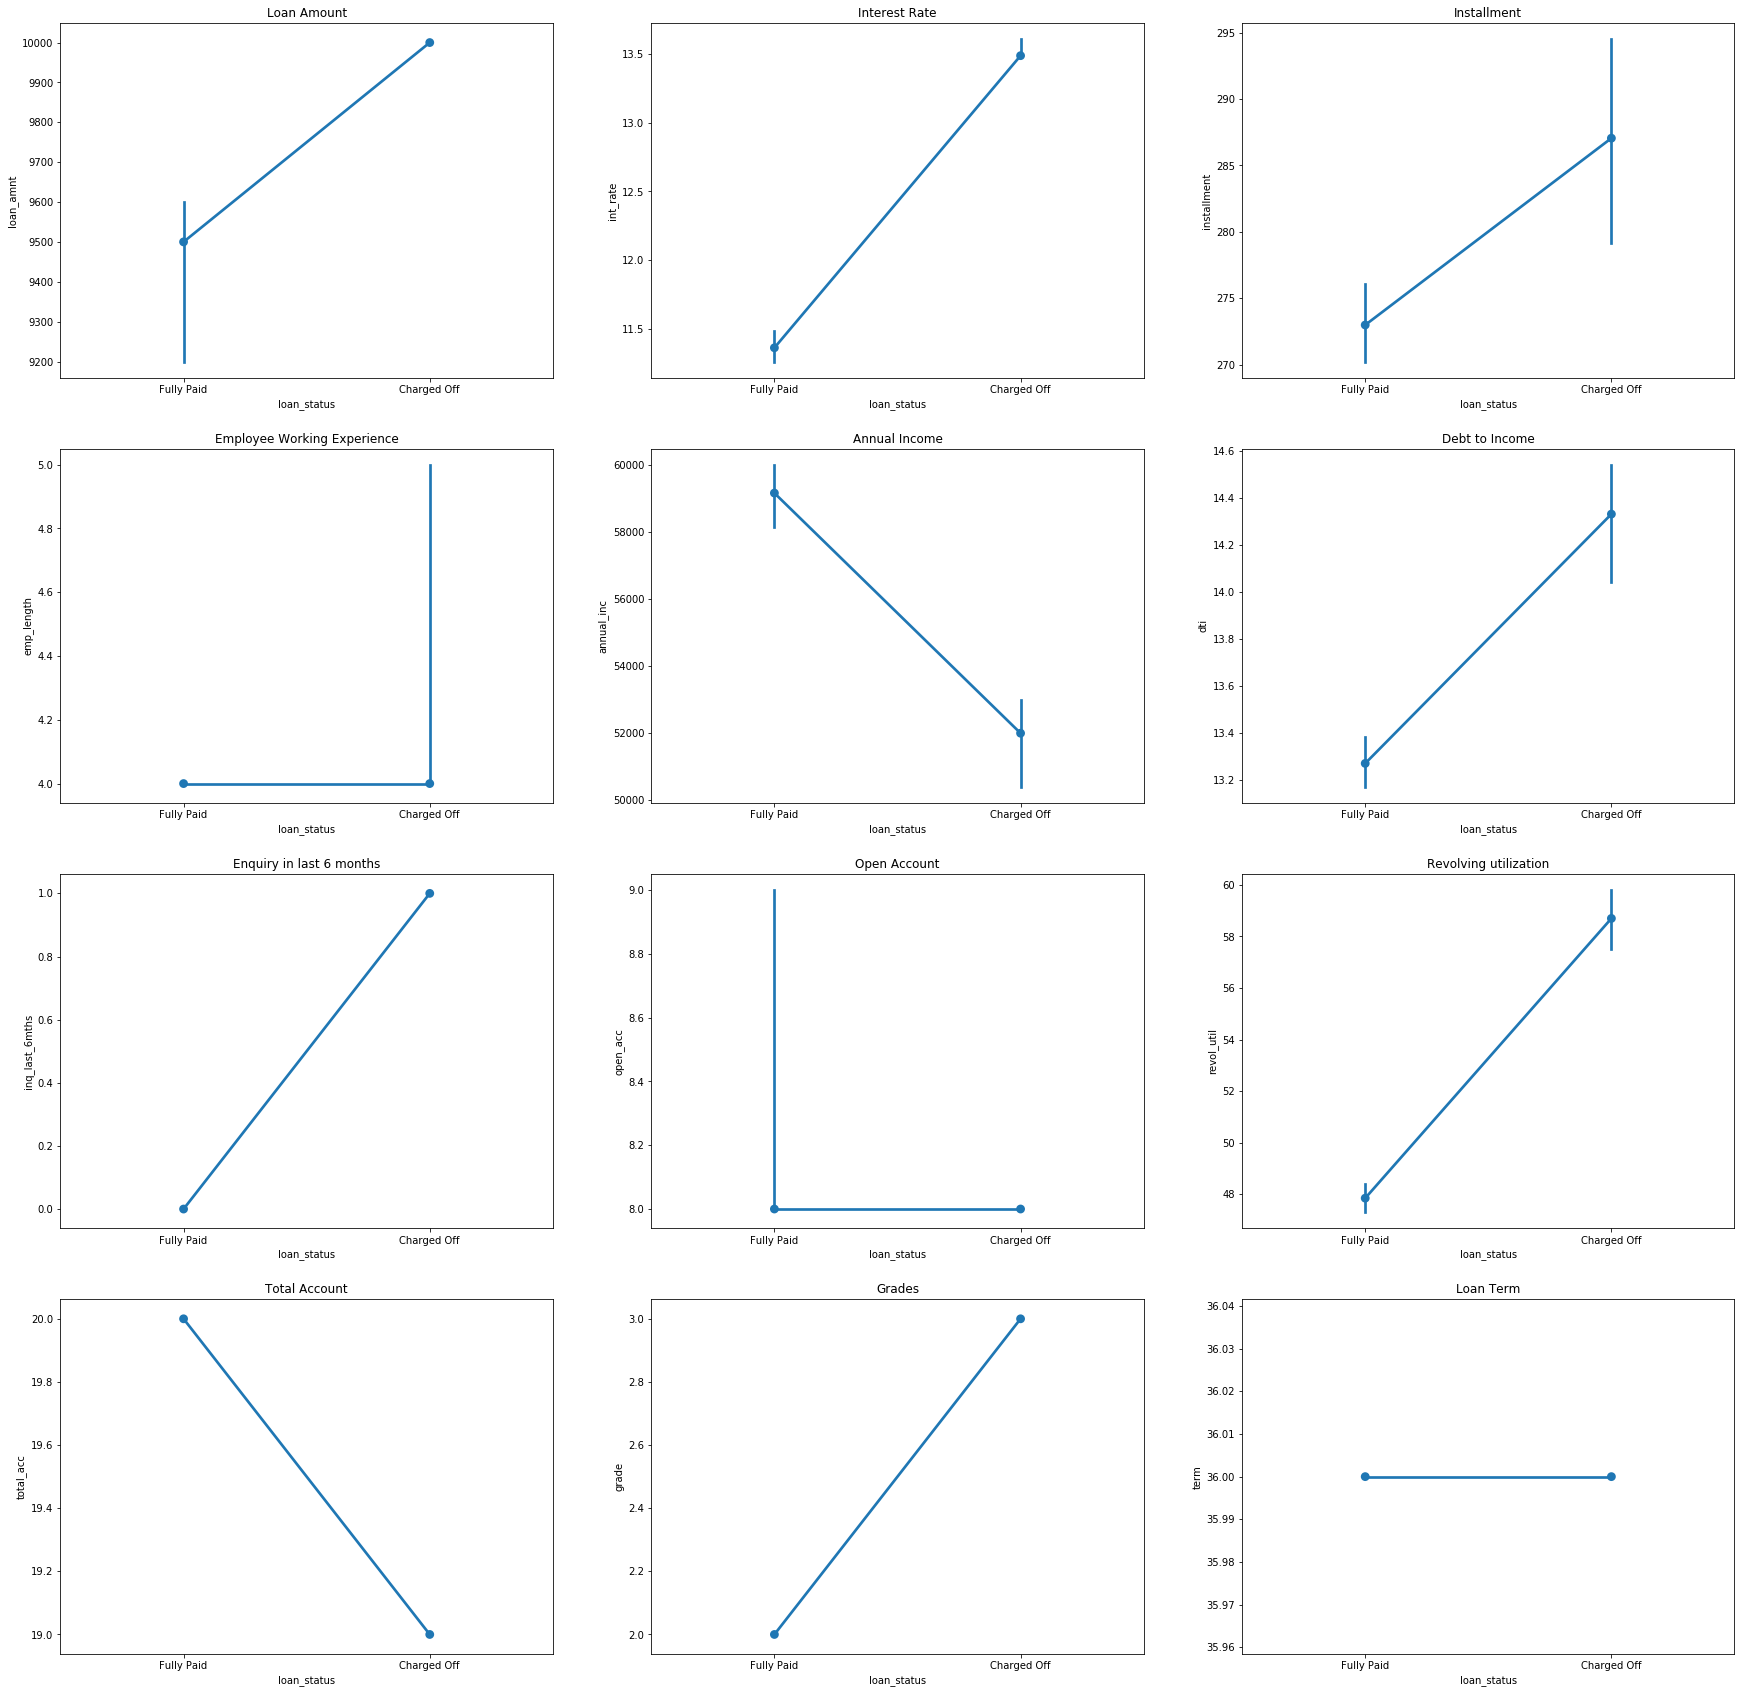

In [76]:
# Segmented univariate analysis

plt.figure(figsize=(30, 30))

# subplot 1: loan_amnt
plt.subplot(4, 3, 1)
sns.pointplot(x='loan_status', y='loan_amnt', data=loan, estimator=np.median)
plt.title("Loan Amount")


# subplot 2: int_rate
plt.subplot(4, 3, 2)
sns.pointplot(x="loan_status", y="int_rate",  data=loan, estimator=np.median);
plt.title("Interest Rate")


# subplot 3: installment
plt.subplot(4, 3, 3)
sns.pointplot(x="loan_status", y="installment",  data=loan, estimator=np.median)
plt.title("Installment")


# subplot 4: emp_length
plt.subplot(4, 3, 4)
sns.pointplot(x="loan_status", y="emp_length",  data=loan, estimator=np.median)
plt.title("Employee Working Experience")


# subplot 5: annual_inc
plt.subplot(4, 3, 5)
sns.pointplot(x='loan_status', y='annual_inc', data=loan, estimator=np.median)
plt.title("Annual Income")


# subplot 6: dti
plt.subplot(4, 3, 6)
sns.pointplot(x='loan_status', y='dti', data=loan, estimator=np.median)
plt.title("Debt to Income")



# subplot 7: inq_last_6mths
plt.subplot(4, 3, 7)
sns.pointplot(x='loan_status', y='inq_last_6mths', data=loan, estimator=np.median)
plt.title("Enquiry in last 6 months")



# subplot 8: open_acc
plt.subplot(4, 3, 8)
sns.pointplot(x='loan_status', y='open_acc', data=loan, estimator=np.median)
plt.title('Open Account')



# subplot 9: revol_util
plt.subplot(4, 3, 9)
sns.pointplot(x='loan_status', y='revol_util', data=loan, estimator=np.median)
plt.title("Revolving utilization")



# subplot 10: total_acc
plt.subplot(4, 3, 10)
sns.pointplot(x='loan_status', y='total_acc', data=loan, estimator=np.median)
plt.title("Total Account")



# subplot 11: grade
plt.subplot(4, 3, 11)
sns.pointplot(x='loan_status', y='grade', data=loan, estimator=np.median)
plt.title("Grades")



# subplot 12: term
plt.subplot(4, 3, 12)
sns.pointplot(x='loan_status', y='term', data=loan, estimator=np.median)
plt.title("Loan Term")

plt.show()

So, from the pointplots above we see there is indeed some correlations between the loan_amnt,int_rate, annual_income, dti, inq_last_6mths, revol_util and total_acc.
emp_length and open_acc do not have much to offer as there is no trend across loan_status.

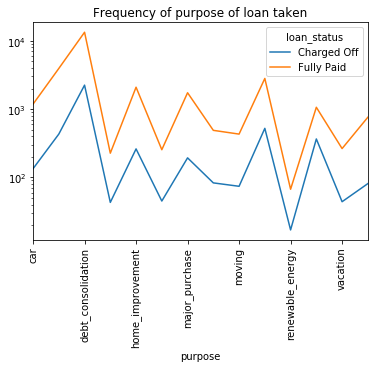

In [77]:
#Let us see if the categorical variables have any effect on the loan_status.
pd.pivot_table(loan, values='id', index=['purpose'], 
               columns=['loan_status'], aggfunc = 'count').plot(rot=90, title='Frequency of purpose of loan taken')
plt.yscale('log')
# We see the trend of purpose for which the loan is taken is similar in both the cases

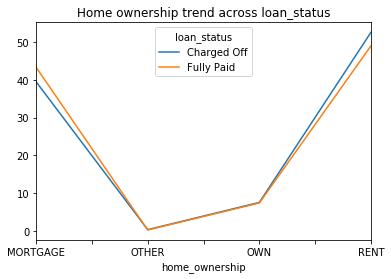

In [78]:
pd.crosstab(loan['home_ownership'],loan['loan_status']).apply(lambda x: x*100/x.sum(), axis=0).plot(title='Home ownership trend across loan_status')
# We see the trend of Home Ownership is also similar in both the cases

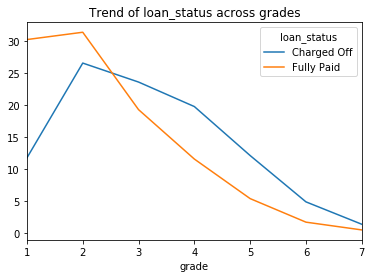

In [79]:
pd.crosstab(loan['grade'],loan['loan_status']).apply(lambda x: x*100/x.sum(), axis=0).plot(title='Trend of loan_status across grades')
# We find that borrowers who had higher grades assigned have defaulted more!

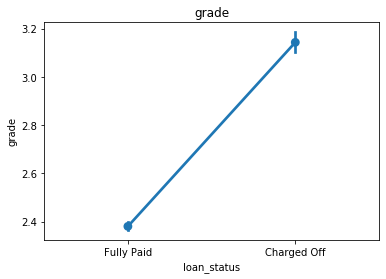

In [80]:
# Segmented univariate analysis
# point plot of a grades across loan_status
sns.pointplot(x='loan_status', y='grade', data=loan)
plt.title('grade')
plt.show()
#Clearly the grade number affects the loan pay off capability of the borrower.

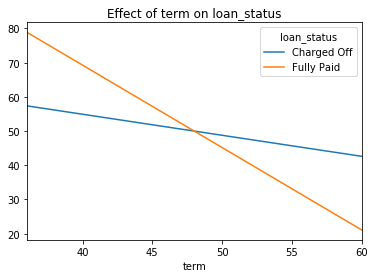

In [81]:
pd.crosstab(loan['term'],loan['loan_status']).apply(lambda x: x*100/x.sum(), axis=0).plot(title='Effect of term on loan_status')
# We find that Defaulters usually have opted for higher term length.

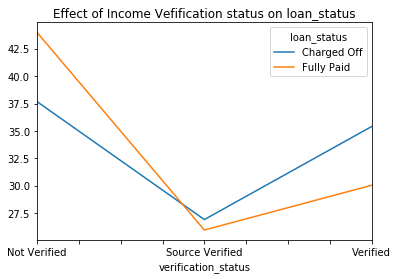

In [82]:
pd.crosstab(loan['verification_status'],loan['loan_status']).apply(lambda x: x*100/x.sum(), axis=0).plot(title='Effect of Income Vefification status on loan_status')

From the above line plots we see that purpose and home_ownership do not have any influence on the loan status, but, Grade and term have. 
Verification_status of the income of the borrower has a strange trend, most defaulters had income verified or source verfified and yet they defaulted and hence the trend is random. For simplicity we do not consider this variable as a factor.

We can use Grade instead of int_rate because the interest rate is assigned after the loan approval and is based on the Grade anyways.
### So we have the below important variables- 
#### loan_amnt or funded_amnt, annual_income, dti,  inq_last_6mths,  revol_util,  total_acc,  grade,  term.


Let us derive some variables to see more dependencies or trends.

Text(0.5, 1.0, 'inst_term_loan_ratio')

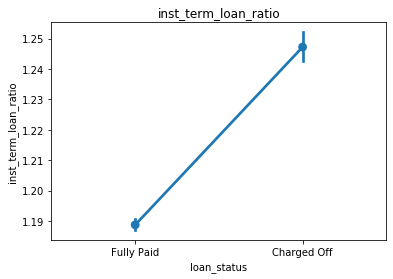

In [83]:
#Deriving some important variables to check
loan['inst_term_loan_ratio'] = loan['installment']*loan['term']/ loan['loan_amnt']
sns.pointplot(x="loan_status", y="inst_term_loan_ratio", data=loan, estimator=np.median)
plt.title("inst_term_loan_ratio")

Text(0.5, 1.0, 'Installment to Loan amount ratio')

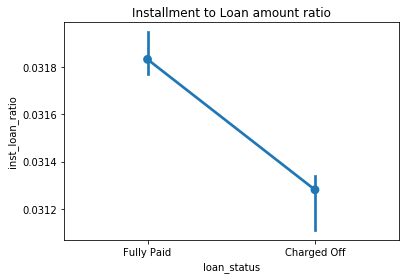

In [84]:
#Deriving some important variables to check
loan['inst_loan_ratio'] = loan['installment']/ loan['loan_amnt']
sns.pointplot(x="loan_status", y="inst_loan_ratio", data=loan, estimator=np.median)
plt.title("Installment to Loan amount ratio")

### We find from the above graphs that the Defaulters had lower installement amounts over a longer term as compared to the borrowers who paid fully.

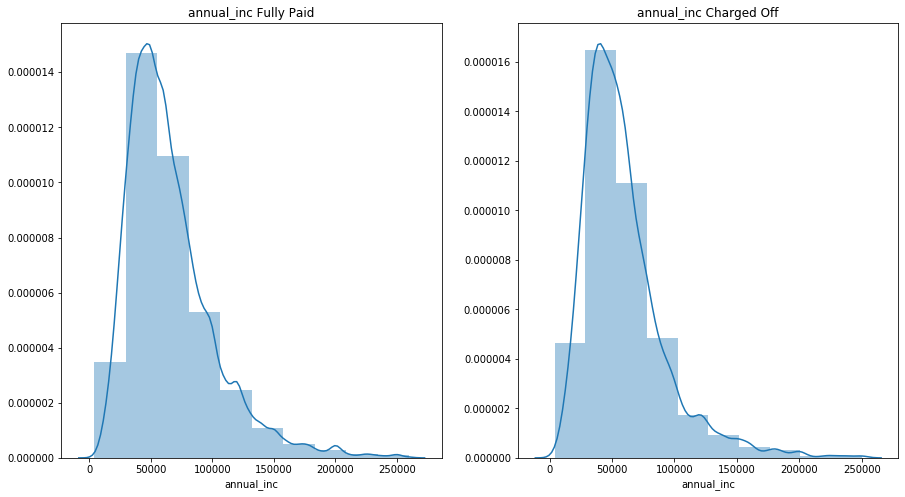

In [85]:
# Let us see the annual income distributions accross loan_status
plt.figure(figsize=(15, 8))
loan_co = loan[loan['loan_status']=='Charged Off']
loan_fp = loan[loan['loan_status']=='Fully Paid']

# subplot 1: annual_inc
plt.subplot(1, 2, 1)
sns.distplot(loan_fp['annual_inc'], bins=10)
plt.title("annual_inc Fully Paid")

# subplot 2: dti
plt.subplot(1,2, 2)
sns.distplot(loan_co['annual_inc'],bins=10)
plt.title("annual_inc Charged Off")

plt.show()

Text(0.5, 1.0, 'Loan amt to Annual Income ratio')

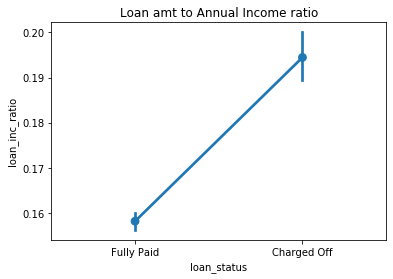

In [86]:
# We see that the annual income distributions are similar 
#but also Fully Paid borrowers had higher annual incomes compared to their Charged off conterparts.

#Deriving loan amount to income ratio to check
loan['loan_inc_ratio'] = loan['loan_amnt']/ loan['annual_inc']
# plot : loan_inc_ratio
sns.pointplot(x="loan_status", y="loan_inc_ratio", data=loan, estimator=np.median)
plt.title("Loan amt to Annual Income ratio")


### Clearly, the loan amount to annual income  ratio for Defaulters are higher!

Text(0.5, 1.0, 'Open acc to Total acc ratio')

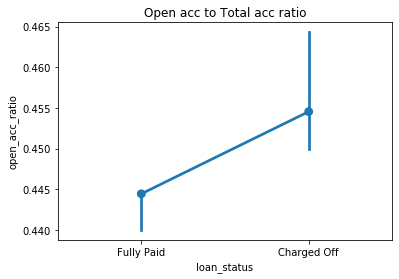

In [87]:
#Deriving some more variables to check
loan['open_acc_ratio'] = loan['open_acc']/ loan['total_acc']
# plot : acc_ratio
sns.pointplot(x="loan_status", y="open_acc_ratio", data=loan, estimator=np.median)
plt.title("Open acc to Total acc ratio")


### Again, the open_acc to total_acc ratio(open credit lines to total credit lines of the borrower) for Defaulters are higher!

Text(0.5, 1.0, 'Earliest reported credit line')

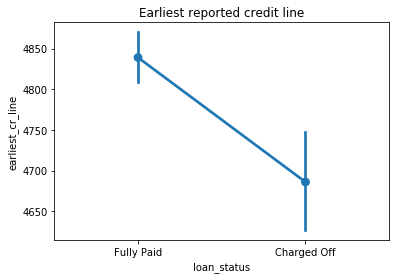

In [88]:
# Let us see if how the earliest_cr_line history effects the loan payoff.
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format ="%b-%y")
#Data is given upto 2011 so, extracting number of days upto Dec 2011
end = np.datetime64('2011-12', 'D')
loan['earliest_cr_line'] = (pd.Timestamp(end) - loan['earliest_cr_line'])
loan['earliest_cr_line'] = loan['earliest_cr_line'].dt.days.astype(int)
# When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: 
# values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068. So, mapping them to correct year.
# Years are mapped 100 years ahead and differnce gives in negative number of days to map it correctly
# 100*365 days are added.
loan['earliest_cr_line'] = [x+36500 if x < 0 else x for x in loan['earliest_cr_line']]

sns.pointplot(x='loan_status', y='earliest_cr_line', data=loan, estimator=np.median)
plt.title("Earliest reported credit line")

### Long credit history obviously means the borrower is more likely to payoff and less likely to default.

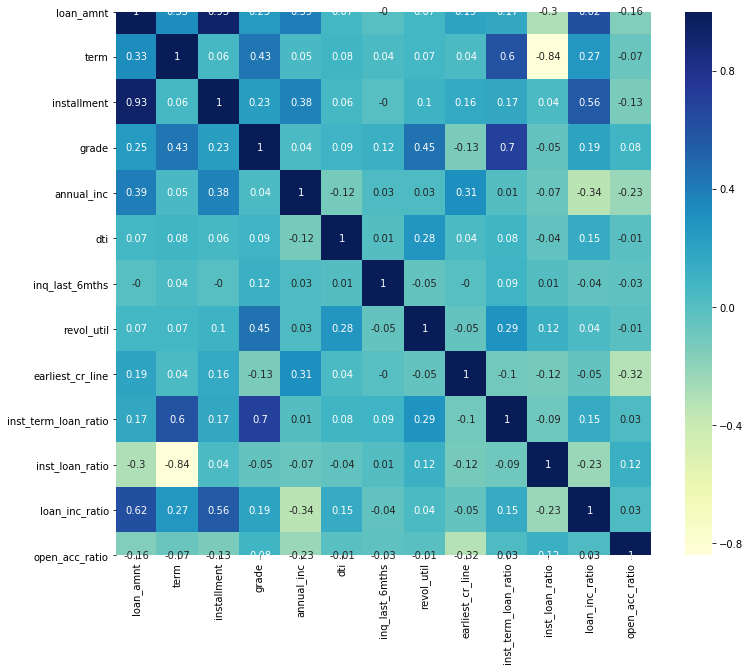

In [89]:
# Let us find correlations cimportant variables to see the actual effect of the variables on each other
loan_imp = loan.filter(['loan_amnt','term','installment','grade',
                        'annual_inc','dti','inq_last_6mths','revol_util','earliest_cr_line',
                        'inst_term_loan_ratio', 'inst_loan_ratio','loan_inc_ratio','open_acc_ratio'])
loan_corr = loan_imp.corr()
loan_corr =round(loan_corr, 2)
plt.figure(figsize=(12,10))
# Correlation heatmap
sns.heatmap(loan_corr, cmap="YlGnBu", annot=True)
plt.show()

In [90]:
#Correlation among loan attributes
loan_corr

,loan_amnt,term,installment,grade,annual_inc,dti,inq_last_6mths,revol_util,earliest_cr_line,inst_term_loan_ratio,inst_loan_ratio,loan_inc_ratio,open_acc_ratio
loan_amnt,1.00,0.33,0.93,0.25,0.39,0.07,-0.00,0.07,0.19,0.17,-0.30,0.62,-0.16
term,0.33,1.00,0.06,0.43,0.05,0.08,0.04,0.07,0.04,0.60,-0.84,0.27,-0.07
installment,0.93,0.06,1.00,0.23,0.38,0.06,-0.00,0.10,0.16,0.17,0.04,0.56,-0.13
grade,0.25,0.43,0.23,1.00,0.04,0.09,0.12,0.45,-0.13,0.70,-0.05,0.19,0.08
annual_inc,0.39,0.05,0.38,0.04,1.00,-0.12,0.03,0.03,0.31,0.01,-0.07,-0.34,-0.23
dti,0.07,0.08,0.06,0.09,-0.12,1.00,0.01,0.28,0.04,0.08,-0.04,0.15,-0.01
inq_last_6mths,-0.00,0.04,-0.00,0.12,0.03,0.01,1.00,-0.05,-0.00,0.09,0.01,-0.04,-0.03
revol_util,0.07,0.07,0.10,0.45,0.03,0.28,-0.05,1.00,-0.05,0.29,0.12,0.04,-0.01
earliest_cr_line,0.19,0.04,0.16,-0.13,0.31,0.04,-0.00,-0.05,1.00,-0.10,-0.12,-0.05,-0.32
inst_term_loan_ratio,0.17,0.60,0.17,0.70,0.01,0.08,0.09,0.29,-0.10,1.00,-0.09,0.15,0.03
